In [1]:
import data_loader as dl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
sessions = dl.get_data()
sessions.to_csv("merged_dataset", sep=' ')

In [3]:
sessions.head()

,session_id,event_type,offered_discount,name,city,product_name,category_path,price,delivery_timestamp,delivery_company,duration,purchase
0,100001,VIEW_PRODUCT,20,Marcelina Wyłupek,Police,NaN,NaN,NaN,NaN,NaN,0.0,True
1,100001,VIEW_PRODUCT,20,Marcelina Wyłupek,Police,LCD BenQ GL2250,Komputery;Monitory;Monitory LCD,349.0,NaN,NaN,88.0,True
2,100001,VIEW_PRODUCT,20,Marcelina Wyłupek,Police,LCD Asus VK248H,Komputery;Monitory;Monitory LCD,799.0,NaN,NaN,180.0,True
3,100001,VIEW_PRODUCT,20,Marcelina Wyłupek,Police,LCD Dell U2412M,Komputery;Monitory;Monitory LCD,399.0,NaN,NaN,185.0,True
4,100001,VIEW_PRODUCT,20,Marcelina Wyłupek,Police,LCD Asus VS197D,Komputery;Monitory;Monitory LCD,269.0,NaN,NaN,471.0,True


# Ile sesji zakończyło się kupnem?

In [4]:
purchases = 0
without_pur = 0
current_id = 0
for i in range(sessions.shape[0]):
    if(sessions.iloc[i]['session_id'] != current_id):
        current_id = sessions.iloc[i]['session_id']
        if(sessions.iloc[i]['purchase']):
            purchases += 1
        else:
            without_pur += 1

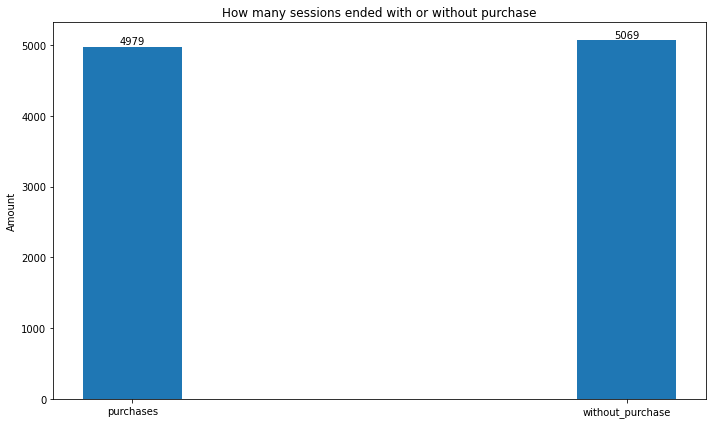

In [5]:
labels = ['purchases', 'without_purchase']
values = [purchases, without_pur]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10,6))
rects = ax.bar(x, values, width)

ax.set_ylabel('Amount')
ax.set_title('How many sessions ended with or without purchase')
ax.set_xticks(x)
ax.set_xticklabels(labels)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

fig.tight_layout()

plt.show()

# Czy oferowana zniżka wpływała na dokonanie zakupu?

In [6]:
purchases_discount = 0
purchases_without_d = 0
without_pur_discount = 0
without_pur_without_d = 0
current_id = 0
for i in range(sessions.shape[0]):
    if(sessions.iloc[i]['session_id'] != current_id):
        current_id = sessions.iloc[i]['session_id']
        if(sessions.iloc[i]['purchase']):
            if(sessions.iloc[i]['offered_discount']):
                purchases_discount += 1
            else:
                purchases_without_d += 1
        else:
            if(sessions.iloc[i]['offered_discount']):
                without_pur_discount += 1
            else:
                without_pur_without_d += 1
                

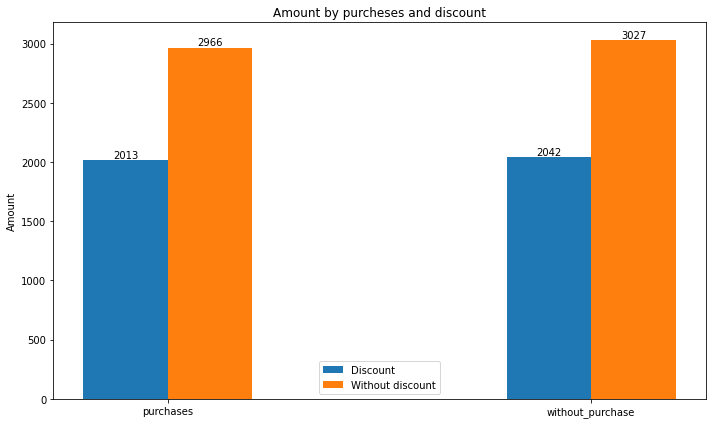

In [7]:
labels = ['purchases', 'without_purchase']
with_discount = [purchases_discount, without_pur_discount]
without_discount = [purchases_without_d, without_pur_without_d]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, with_discount, width, label='Discount')
rects2 = ax.bar(x + width/2, without_discount, width, label='Without discount')
                
ax.set_ylabel('Amount')
ax.set_title('Amount by purcheses and discount')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
                
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Jak wpływała wielkość oferowanej zniżki?

In [8]:
discounts = sessions['offered_discount'].unique()
discounts.sort()
discounts

array([ 0,  5, 10, 15, 20])

In [9]:
data = [[0,0], [0,0], [0,0], [0,0], [0,0]]
current_id = 0
for i in range(sessions.shape[0]):
    if(sessions.iloc[i]['session_id'] != current_id):
        current_id = sessions.iloc[i]['session_id']
        if(sessions.iloc[i]['purchase']):
            discount_index = sessions.iloc[i]['offered_discount']/5
            data[int(discount_index)][0] += 1
        else:
            discount_index = sessions.iloc[i]['offered_discount']/5
            data[int(discount_index)][1] += 1


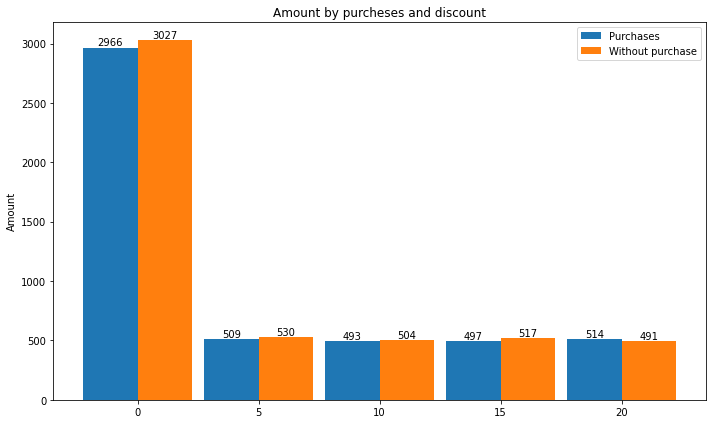

In [10]:
labels = ['0', '5', '10', '15', '20']
purchases = [data[0][0], data[1][0], data[2][0], data[3][0], data[4][0]]
without_purchases = [data[0][1], data[1][1], data[2][1], data[3][1], data[4][1]]

x = np.arange(len(labels))
width = 0.45

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, purchases, width, label='Purchases')
rects2 = ax.bar(x + width/2, without_purchases, width, label='Without purchase')
                
ax.set_ylabel('Amount')
ax.set_title('Amount by purcheses and discount')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
                
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Długość sesji a zakup

In [11]:
current_id = 100001
current_duration = 0
purchase = False
data_set = []
cities_data = []
for i in range(sessions.shape[0]):
    if(sessions.iloc[i]['session_id'] != current_id):
        if(purchase):
            cities_data.append(sessions.iloc[i]['city'])
        temp = [current_id, current_duration, purchase]
        data_set.append(temp)
        current_id = sessions.iloc[i]['session_id']
        current_duration = sessions.iloc[i]['duration']
        purchase = sessions.iloc[i]['purchase']
    else:
        current_duration = sessions.iloc[i]['duration']
        

In [12]:
purchases = []
without_p = []

for i in range(len(data_set)):
    if(data_set[i][2]):
        purchases.append(data_set[i][1])
    else:
        without_p.append(data_set[i][1])

pur_time = np.array(purchases)
without_pur_time = np.array(without_p)

In [13]:
df = pd.DataFrame({"Average" : [np.average(pur_time), np.average(without_pur_time)],
                   "Median" : [np.median(pur_time), np.median(without_pur_time)],
                   "Min" : [np.min(pur_time), np.min(without_pur_time)],
                   "Max" : [np.max(pur_time), np.max(without_pur_time)],
                   "Variance" : [np.var(pur_time), np.var(without_pur_time)],
                   "Standard deviation" : [np.std(pur_time), np.std(without_pur_time)],
                   "Amount" : [len(pur_time), len(without_pur_time)]})
df = df.rename(index={0 : "Purchases", 1 : "Without Purchase"})
df

,Average,Median,Min,Max,Variance,Standard deviation,Amount
Purchases,469.188429,292.0,5.0,2158.0,177233.239705,420.990783,4978
Without Purchase,327.533439,141.0,0.0,2368.0,183114.789028,427.919138,5069


# Długość trwania sesji zakończonej zakupem

In [14]:
purchase = np.zeros(22)
for i in range(len(pur_time)):
    purchase[int(pur_time[i]/100)] += 1

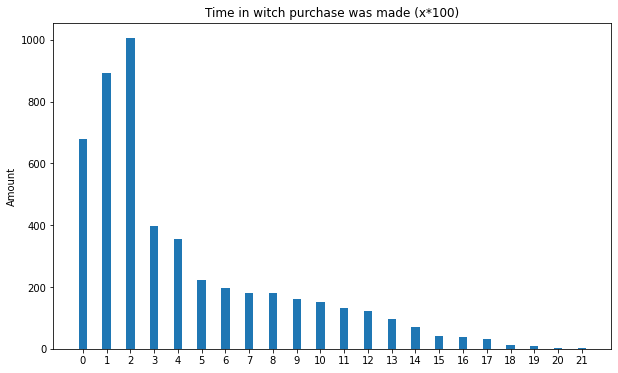

In [15]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
          '14', '15', '16', '17', '18', '19', '20', '21']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
rects = ax.bar(x, purchase, width)

ax.set_ylabel('Amount')
ax.set_title('Time in witch purchase was made (x*100)')
ax.set_xticks(x)
ax.set_xticklabels(labels)


plt.show()

# Długość trwania sesji która nie zakończyła się zakupem

In [16]:
without = np.zeros(24)
for i in range(len(without_pur_time)):
    without[int(without_pur_time[i]/100)] += 1

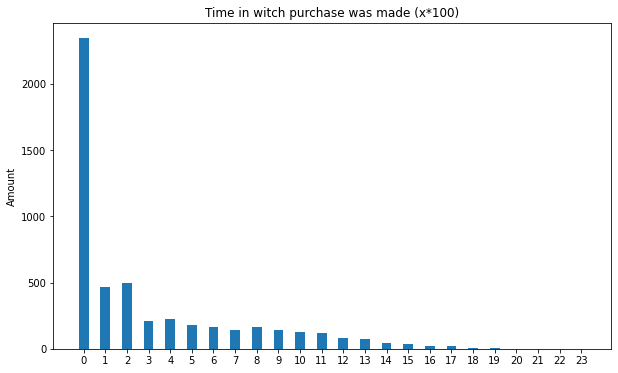

In [17]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
          '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

x = np.arange(len(labels))
width = 0.45

fig, ax = plt.subplots(figsize=(10,6))
rects = ax.bar(x, without, width)

ax.set_ylabel('Amount')
ax.set_title('Time in witch purchase was made (x*100)')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

# Kupna a miasta

In [18]:
cities, counts = np.unique(cities_data, return_counts=True)

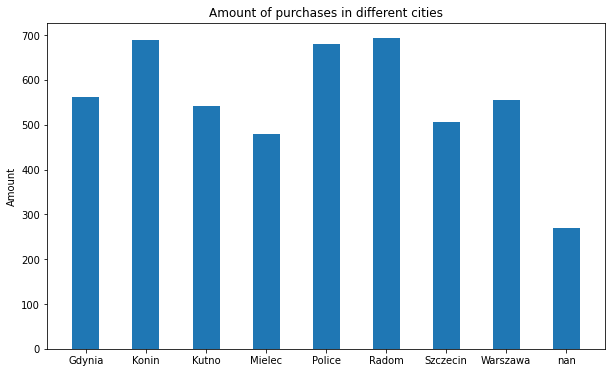

In [19]:
x = np.arange(len(cities))
width = 0.45

fig, ax = plt.subplots(figsize=(10,6))
rects = ax.bar(x, counts, width)

ax.set_ylabel('Amount')
ax.set_title('Amount of purchases in different cities')
ax.set_xticks(x)
ax.set_xticklabels(cities)

plt.show()